In [1]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import re

from root_numpy import root2array

In [3]:
filedir = '/Users/davidkaleko/Data/larlite/080116_selection_output/'
!ls $filedir | grep ana

ana_out_trkKalekopandoraNuPMAPlustrackkalmanhit_vtxpmtrack_mcc71ext2bnb3_1.root
ana_out_trkKalekopandoraNuPMAPlustrackkalmanhit_vtxpmtrack_mcc71ext2bnb3_2.root
ana_out_trkKalekopandoraNuPMAPlustrackkalmanhit_vtxpmtrack_mcc71ext2bnb3_3.root
ana_out_trkKalekopandoraNuPlustrackkalmanhit_vtxpandoraNu_mcc71ext2bnb3_1.root
ana_out_trkKalekopandoraNuPlustrackkalmanhit_vtxpandoraNu_mcc71ext2bnb3_2.root
ana_out_trkKalekopandoraNuPlustrackkalmanhit_vtxpandoraNu_mcc71ext2bnb3_3.root
ana_out_trkpandoraNuPMA_vtxpmtrack_mcc71ext2bnb3_1.root
ana_out_trkpandoraNuPMA_vtxpmtrack_mcc71ext2bnb3_2.root
ana_out_trkpandoraNuPMA_vtxpmtrack_mcc71ext2bnb3_3.root
ana_out_trkpandoraNu_vtxpandoraNu_mcc71ext2bnb3_1.root
ana_out_trkpandoraNu_vtxpandoraNu_mcc71ext2bnb3_2.root
ana_out_trkpandoraNu_vtxpandoraNu_mcc71ext2bnb3_3.root


In [19]:
track_producer = 'pandoraNu'#'KalekopandoraNuPMAPlustrackkalmanhit'#pandoraNuPMA'
vtx_producer = 'pandoraNu'#'pandoraNu'#'pmtrack'

In [20]:
mcnu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_1.root'%(track_producer,vtx_producer)
#mcbkg = 'XiaoEventAna_out_INTIMECOSMIC.root'
datanu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_3.root'%(track_producer,vtx_producer)
databkg = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_2.root'%(track_producer,vtx_producer)

files = { 'mcnu' : filedir + mcnu, 
          #'mcbkg' : filedir + mcbkg,
         'datanu' : filedir + datanu, 
         'databkg' : filedir + databkg }

mycuts = ['longest_trk_len > 100.', 'nu_E_estimate > 2.5',
         'second_longest_trk_len > 16.',
          'longest_tracks_dotprod_trkendpoints > -0.5']
#mcbkgcut = 'correct_ID == 0'
#bkgnorm = 1.2

In [21]:
df_dict = {}

for sample, filepath in files.iteritems():
    df_dict[sample] = pd.DataFrame( root2array ( filepath, 'tree' ) )

In [22]:
n_evts_analyzed = { 'mcnu': 180000, 'databkg' : 380897, 'datanu' : 547617 }

In [23]:
pot_per_sample = { 'mcnu' : (1.2105e15) * n_evts_analyzed['mcnu'],
                   'datanu' : 4.88e19 }
pot_per_sample['databkg'] = pot_per_sample['datanu'] * 0.844 * \
                  float(n_evts_analyzed['datanu'])/n_evts_analyzed['databkg']
#pot_per_sample['mcbkg'] = pot_per_sample['databkg'] * (1./0.336) * \
#                  float(n_evts_analyzed['mcbkg'])/n_evts_analyzed['databkg'] 

In [24]:
print n_evts_analyzed
print pot_per_sample

{'datanu': 547617, 'databkg': 380897, 'mcnu': 180000}
{'datanu': 4.88e+19, 'databkg': 5.921498699753477e+19, 'mcnu': 2.1789e+20}


['true_nu_pdg' 'true_nu_E' 'true_nu_CCNC' 'true_nu_mode'
 'longest_trk_contained' 'all_trks_contained' 'p_phi' 'mu_phi' 'correct_ID'
 'mu_end_dedx' 'mu_start_dedx' 'fndecay' 'fppdxdz' 'fppdydz' 'fpppz'
 'fppenergy' 'mu_p_dirdot' 'true_lepton_pdg' 'true_lepton_momentum'
 'n_associated_tracks' 'longest_trk_len' 'longest_trk_cosy'
 'second_longest_trk_len' 'longest_trk_theta' 'longest_trk_MCS_mom'
 'longest_trk_spline_mom' 'nu_E_estimate' 'longest_trk_avg_calo'
 'true_nu_x' 'true_nu_y' 'true_nu_z' 'dist_reco_true_vtx'
 'max_tracks_dotprod' 'longest_tracks_dotprod'
 'longest_tracks_dotprod_trkendpoints' 'longest_track_end_x'
 'longest_track_end_y' 'longest_track_end_z' 'brightest_BSW_flash_PE'
 'BSW_flash_z_range' 'longest_trk_dot_truemuondir']


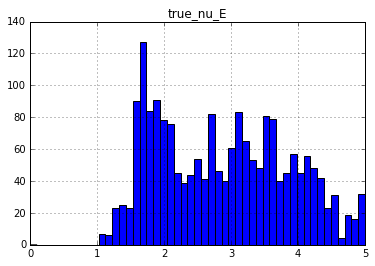

In [25]:
print df_dict['datanu'].columns.values
#vars_to_try = ['longest_trk_len','nu_E_estimate','longest_trk_theta',\
#               'longest_trk_MCS_mom', 'n_associated_tracks']
fart = df_dict['mcnu'].query('nu_E_estimate > 2.5 and correct_ID').hist('true_nu_E',bins=np.linspace(0,5,50))


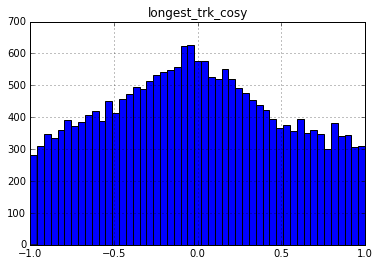

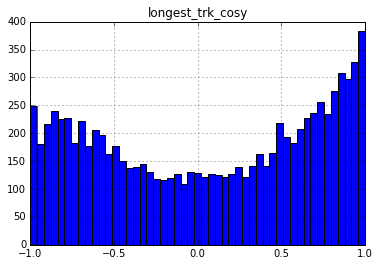

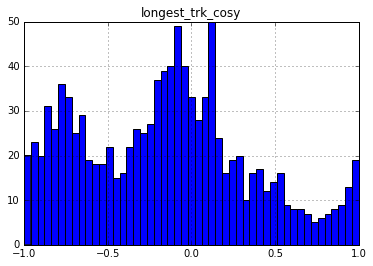

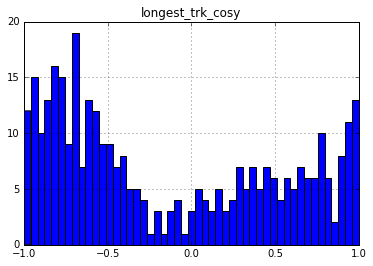

In [27]:
myquery = 'nu_E_estimate > 2.5'
#fart = df_dict['mcnu'].hist('longest_trk_avg_calo',bins=np.linspace(0,15,50))
#fart = df_dict['datanu'].hist('longest_trk_avg_calo',bins=np.linspace(0,15,50))
#fart = df_dict['mcnu'].query(myquery).hist('longest_trk_avg_calo',bins=np.linspace(0,15,50))
#fart = df_dict['datanu'].query(myquery).hist('longest_trk_avg_calo',bins=np.linspace(0,15,50))


fart = df_dict['mcnu'].hist('longest_trk_cosy',bins=np.linspace(-1,1,50))
fart = df_dict['datanu'].hist('longest_trk_cosy',bins=np.linspace(-1,1,50))
fart = df_dict['mcnu'].query(myquery).hist('longest_trk_cosy',bins=np.linspace(-1,1,50))
fart = df_dict['datanu'].query(myquery).hist('longest_trk_cosy',bins=np.linspace(-1,1,50))





In [28]:
def plotVariableComparison(myvar, mybins, myquery, mytitle, myshapeonly = False, myylims = None,\
                           myxlabel = 'test', myylabel = 'test', mylogy = None):

    plt.figure(figsize=(10,6))
    poop = plt.grid(True)
    plt.title(mytitle,fontsize=16)
    #plt.ylabel('Events: 5e19 POT Normalized',fontsize=16)
    
    mydict = df_dict['mcnu']
    if myquery: mydict = df_dict['mcnu'].query(myquery)
    #myvals = mydict[myvar].values
    myweight = (5.e19) / pot_per_sample['mcnu']
    
    myvals_pion = mydict.query('fndecay >= 10 and correct_ID == 1')[myvar].values
    myvals_kaon = mydict.query('fndecay < 10 and correct_ID == 1')[myvar].values
    myvals_cosm = mydict.query('correct_ID == 0')[myvar].values
    #integral = float(len(myvals))*myweight
    nphist = np.histogram(myvals_cosm,bins=mybins,
                          weights=[myweight]*len(myvals_cosm),
                          normed=myshapeonly)
    integral_cosm = np.sum(nphist[0])  
    nphist = np.histogram(myvals_pion,bins=mybins,
                          weights=[myweight]*len(myvals_pion),
                          normed=myshapeonly)
    integral_pion = np.sum(nphist[0])   
    nphist = np.histogram(myvals_kaon,bins=mybins,
                          weights=[myweight]*len(myvals_kaon),
                          normed=myshapeonly)
    integral_kaon = np.sum(nphist[0])

    #mydict_intime = df_dict['mcbkg']
    #if myquery: mydict_intime = df_dict['mcbkg'].query(myquery)
    #myweight_intime = (5.e19) / pot_per_sample['mcbkg']
    #myvals_intime = mydict_intime[myvar].values
    #nphist = np.histogram(myvals_intime,bins=mybins,
    #                      weights=[myweight_intime]*len(myvals_intime),
    #                      normed=myshapeonly)
    #integral_intime = np.sum(nphist[0])
    
    poop = plt.hist([myvals_cosm,myvals_pion,myvals_kaon],bins=mybins,
                    label=[#'MC: Cosmic Bkg. from In Time Cosmic Entries = %0.2f' % integral_intime,\
                           'MC: Cosmic Bkg. from BNB+Cosmic Entries = %0.2f' % integral_cosm, \
                           'MC: Numu from Pion Bkg. Entries = %0.2f' % integral_pion, \
                           'MC: Kaon Signal. Entries = %0.2f\n    Total MC = (%0.2f)' \
                           % (integral_kaon,integral_cosm+integral_pion+integral_kaon)],
                    alpha=0.5,
                    weights=[#[myweight_intime]*len(myvals_intime),
                             [myweight]*len(myvals_cosm),
                             [myweight]*len(myvals_pion),
                             [myweight]*len(myvals_kaon)],
                             normed=myshapeonly,
                   color=['r','b','g'],
                    stacked=True,
                   rwidth=1.)

    mybnbdict = df_dict['datanu']    
    if myquery: mybnbdict = df_dict['datanu'].query(myquery)
    mybnbvals = mybnbdict[myvar].values
    mybnbweight = (5.e19) / pot_per_sample['datanu']
    
    blah = plt.hist(mybnbvals,bins=mybins,color='g',
                    alpha=0,weights=[mybnbweight]*len(mybnbvals),normed=myshapeonly)
    
    ybnbvals = blah[0]
    xbnbvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
    bnbintegral = np.sum(blah[0])
    #awefia = plt.plot(xbnbvals,ybnbvals,'bo',
    #                  label='BNB DATA: Entries = %0.2f' % bnbintegral
    #                 )

    myextvals = df_dict['databkg'][myvar].values
    if myquery: myextvals = df_dict['databkg'].query(myquery)[myvar].values
    myextweight = (5.e19) / pot_per_sample['databkg']
    extintegral = 0.
    if len(myextvals):
        blah = plt.hist(myextvals,bins=mybins,color='g',
                        alpha=0,weights=[myextweight]*len(myextvals),normed=myshapeonly)
    
        yextvals = blah[0]
        xextvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
        yerrs = np.sqrt(np.array(yextvals)*myextweight)
        #extintegral = float(len(myextvals))*myextweight
        extintegral = np.sum(blah[0])
        #awefia = plt.errorbar(xextvals,yextvals,fmt='ro', yerr=yerrs,
        #                  label='BNB EXT DATA: Entries = %0.2f' % extintegral
        #                 )

        diffintegral = bnbintegral-extintegral
        yerrs = np.sqrt(np.array(ybnbvals)*mybnbweight + np.array(yextvals)*myextweight)
        #if yerrs is zero, set equal to 1 event
        yerrs = [x if x else 1 for x in yerrs]
        awefia = plt.errorbar(xextvals,ybnbvals-yextvals,fmt='mo',yerr = yerrs,
                          label='BNB DATA - BNB EXT DATA (%0.2f)' % diffintegral
                         )
    else:
        diffintegral = bnbintegral
        yerrs = np.sqrt(np.array(ybnbvals)*mybnbweight)
        #if yerrs is zero, set equal to 1 event
        yerrs = [x if x else 1 for x in yerrs]
        awefia = plt.errorbar(xbnbvals,ybnbvals,fmt='mo',yerr = yerrs,
                          label='BNB DATA - BNB EXT DATA (%0.2f)' % diffintegral
                         )
    if mylogy is None:
        plt.ylim((0, plt.ylim()[1]))
        if myylims is not None:
            plt.ylim(myylims)
    leg = plt.legend()
    plt.xlabel(myxlabel,fontsize=16)
    plt.ylabel(myylabel,fontsize=16)
    leg.get_frame().set_alpha(0.5)
    if mylogy is not None:
        aewfwa = plt.yscale('log', nonposy='clip')
        plt.ylim((0.1,plt.ylim()[1]))

In [29]:
def loopCutsPlots(myvar, mybins, mytitlebase, myshapeonly, myxlabel, myylabel, mylogy):

    myquery = ''
    mytitle = mytitlebase + ': NO CUTS'
    plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,\
                          myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)
    
    for myquery in mycuts:
        mytitle = mytitlebase + ': %s' % myquery
        plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,\
                              myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)

    myquery = str.join(' and ',mycuts)
    print myquery
    mytitle = mytitlebase + ': ALL CUTS'
    plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,\
                           myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)

longest_trk_len > 100. and nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


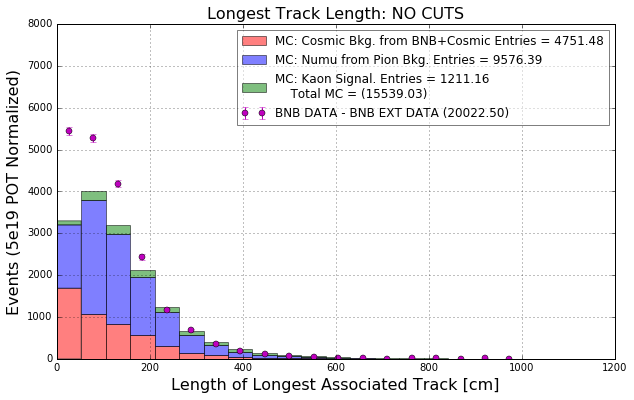

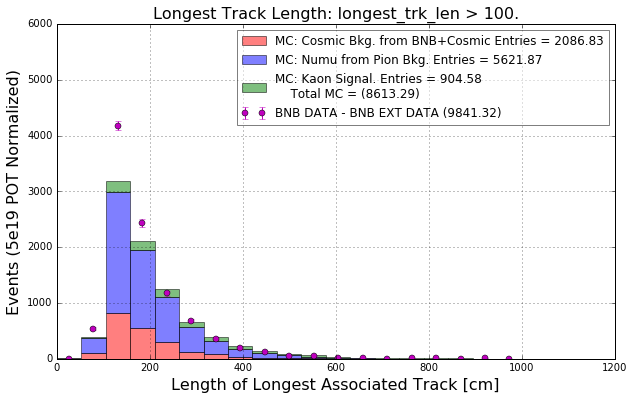

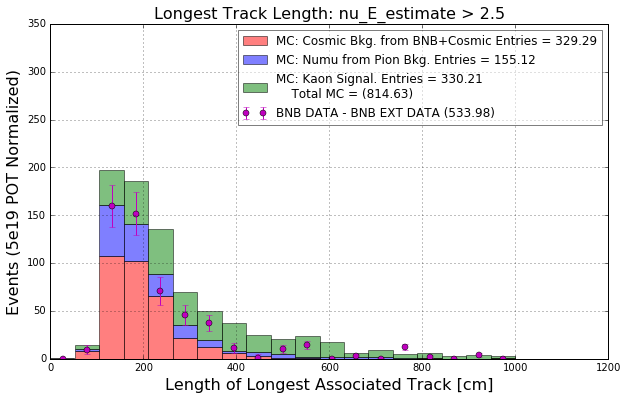

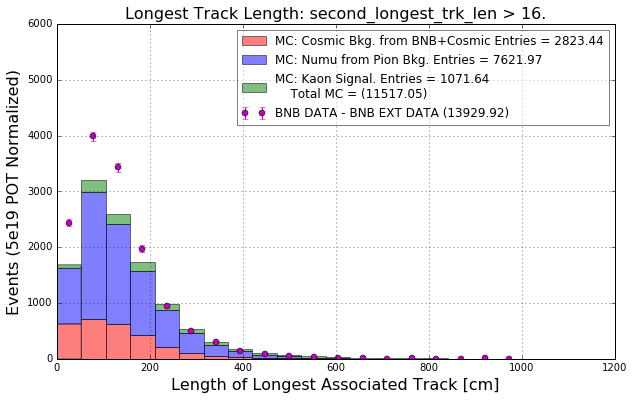

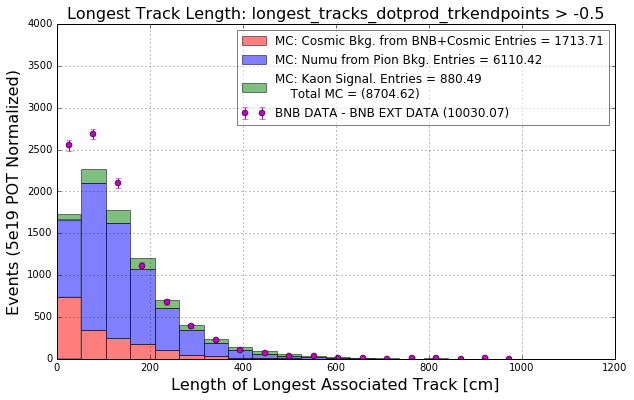

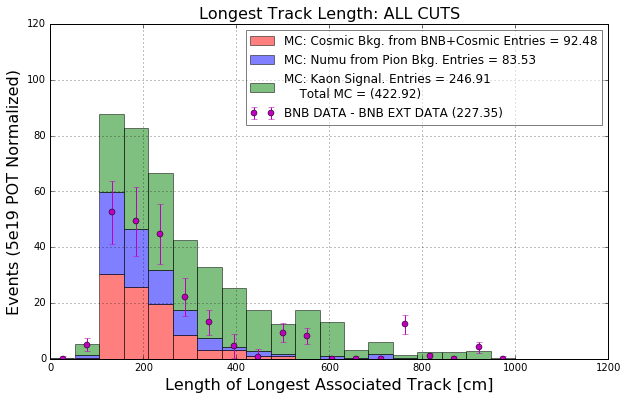

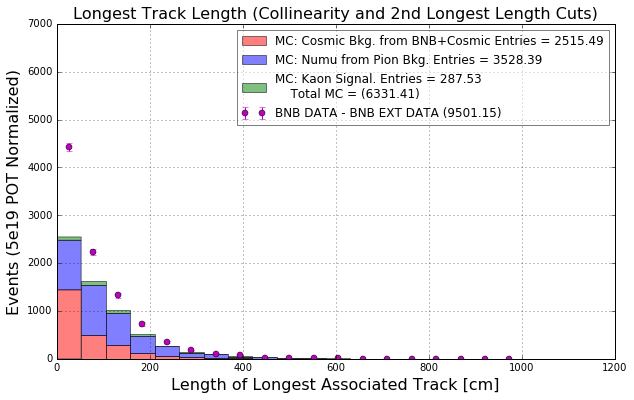

In [30]:
mylogy = None
myvar = 'longest_trk_len'
mybins = np.linspace(0,1000,20)
mytitlebase = 'Longest Track Length'
myshapeonly = False
myxlabel = 'Length of Longest Associated Track [cm]'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)

myvar = 'longest_trk_len'
mybins = np.linspace(0,1000,20)
dummy = 'Longest Track Length (Collinearity and 2nd Longest Length Cuts)'
myshapeonly = False
myxlabel = 'Length of Longest Associated Track [cm]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = 'longest_trk_contained'
plotVariableComparison(myvar,mybins,myquery,dummy,myshapeonly,myxlabel=myxlabel,myylabel=myylabel)

longest_trk_len > 100. and nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


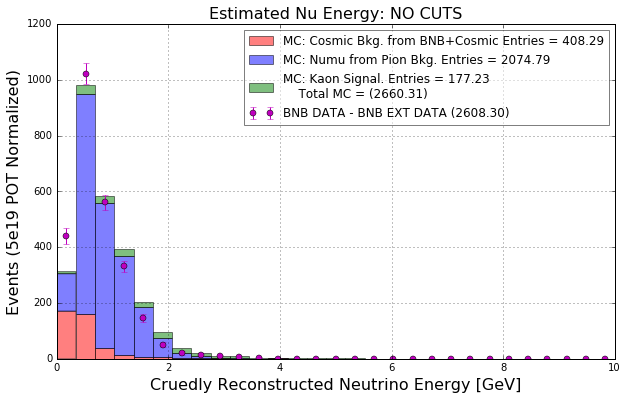

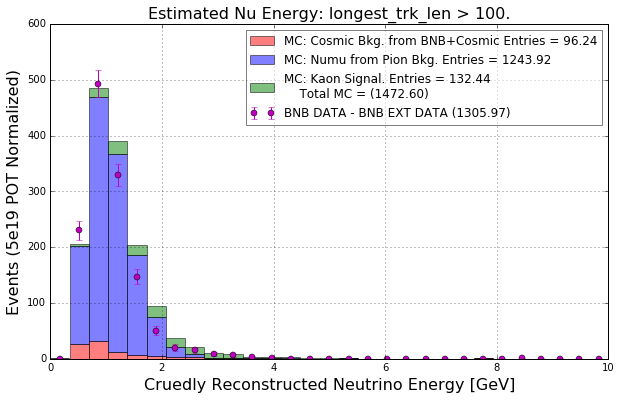

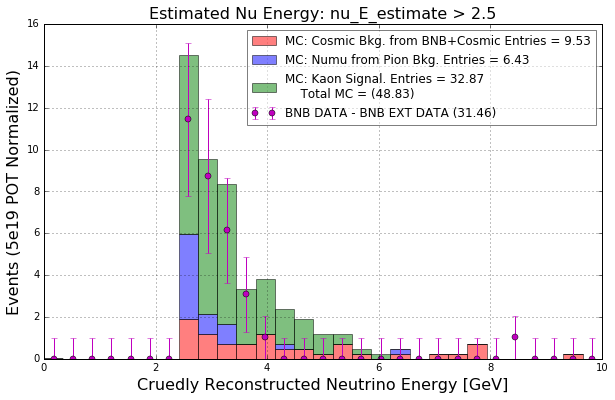

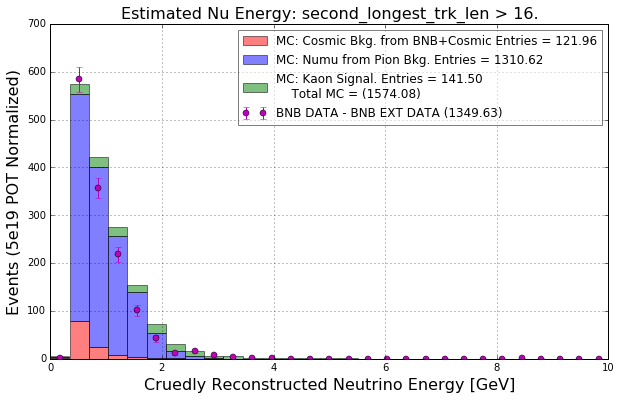

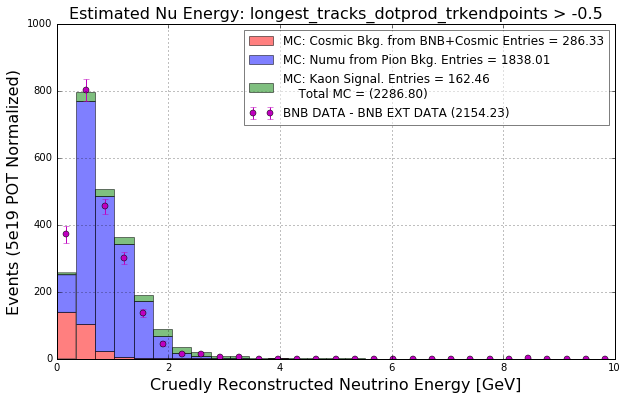

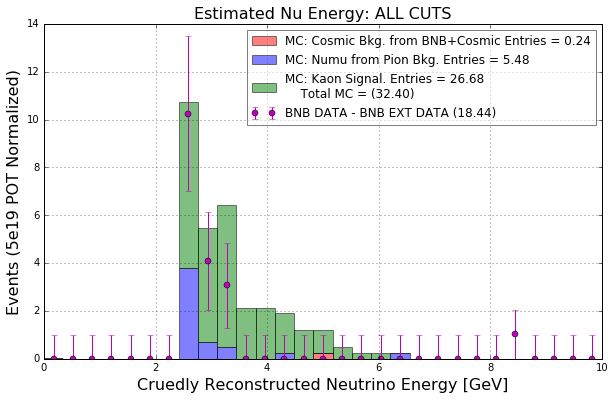

In [23]:
mylogy = None
myvar = 'nu_E_estimate'
mybins = np.linspace(0,10,30)
dummy = 'Estimated Nu Energy (Tight y- Fid Vol)'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = 'longest_track_end_y > -70 and longest_track_end_y < 70'
#plotVariableComparison(myvar,mybins,myquery,dummy,myshapeonly,myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)

myvar = 'nu_E_estimate'
mybins = np.linspace(0,10,30)
dummy = 'Estimated Nu Energy (Tight z- Fid Vol)'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = 'longest_track_end_z > 30 and longest_track_end_z < 900'
#plotVariableComparison(myvar,mybins,myquery,dummy,myshapeonly,myxlabel=myxlabel,myylabel=myylabel,mylogy=mylogy)

myvar = 'nu_E_estimate'
mybins = np.linspace(0,10,30)
mytitlebase = 'Estimated Nu Energy'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel,mylogy=mylogy)

nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


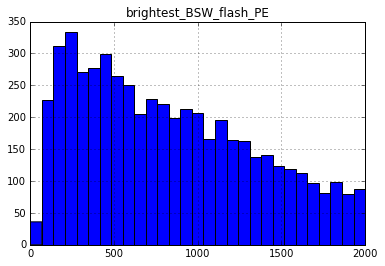

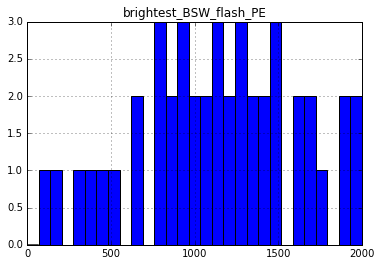

In [116]:
plt.figure(figsize=(10,6))
mybins=np.linspace(0,2000,30)
fuck = df_dict['mcnu'].query('correct_ID').hist('brightest_BSW_flash_PE',bins=mybins)
plt.figure(figsize=(10,6))
myquery = str.join(' and ',mycuts)
print myquery
fuck = df_dict['mcnu'].query('correct_ID and %s'%myquery).hist('brightest_BSW_flash_PE',bins=mybins)

nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


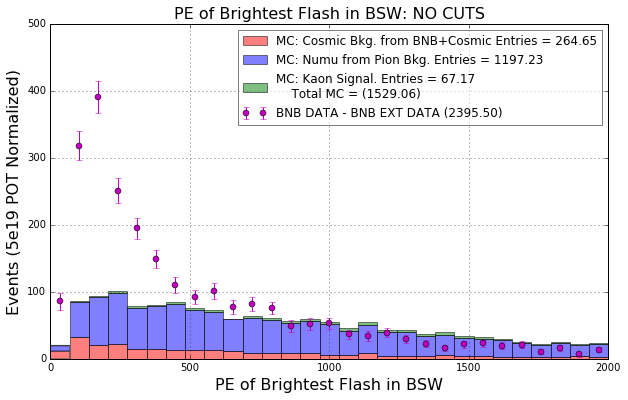

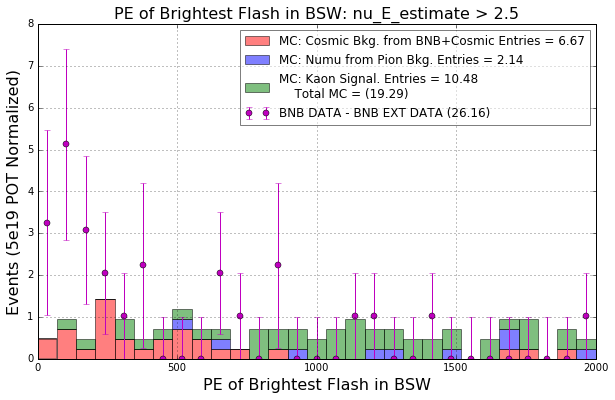

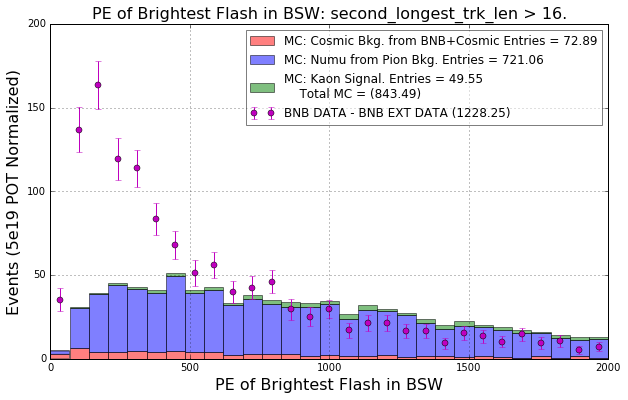

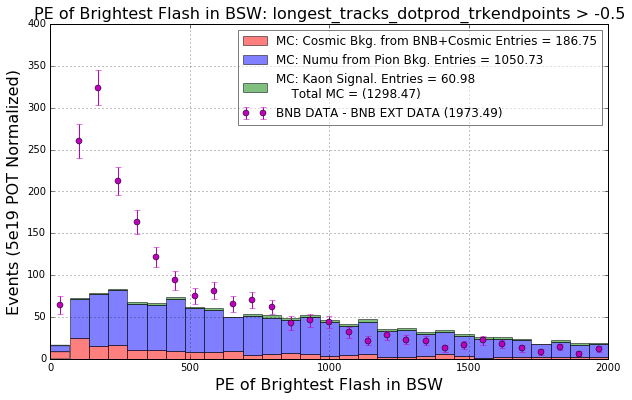

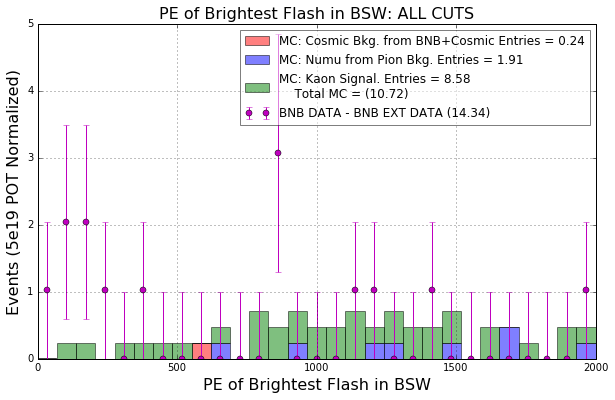

In [117]:
myvar = 'brightest_BSW_flash_PE'
mylogy = None
mybins = np.linspace(0,2000,30)
mytitlebase = 'PE of Brightest Flash in BSW'
myshapeonly = False
myxlabel = 'PE of Brightest Flash in BSW'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel,mylogy=mylogy)


#BSW_flash_z_range

nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


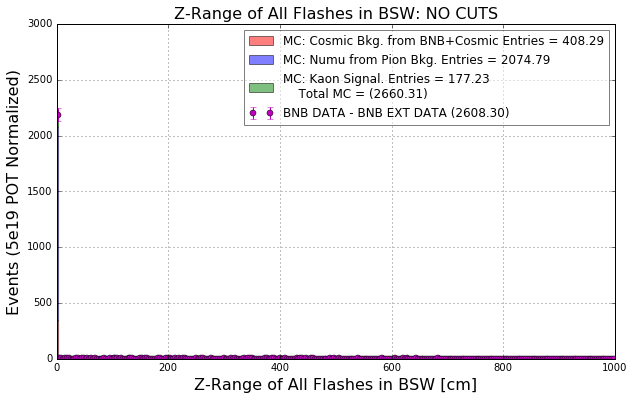

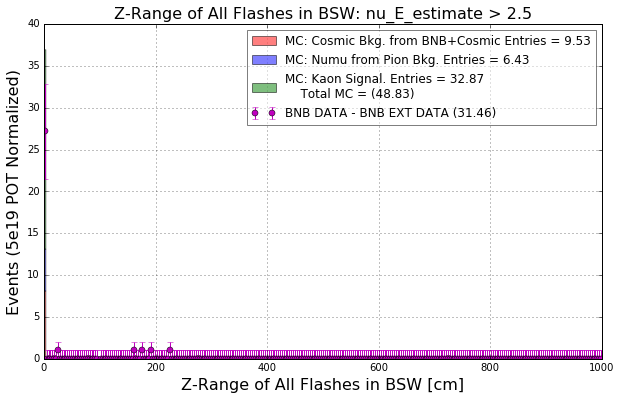

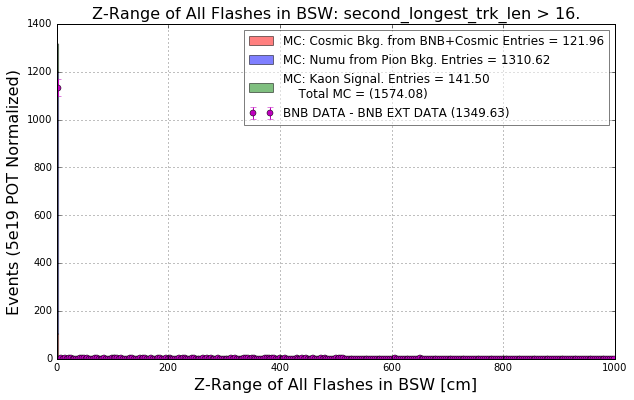

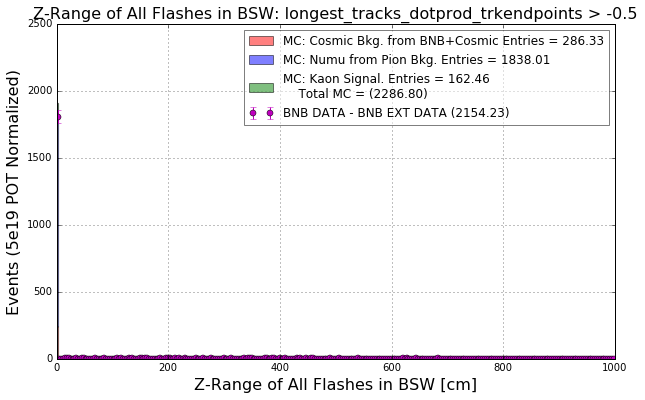

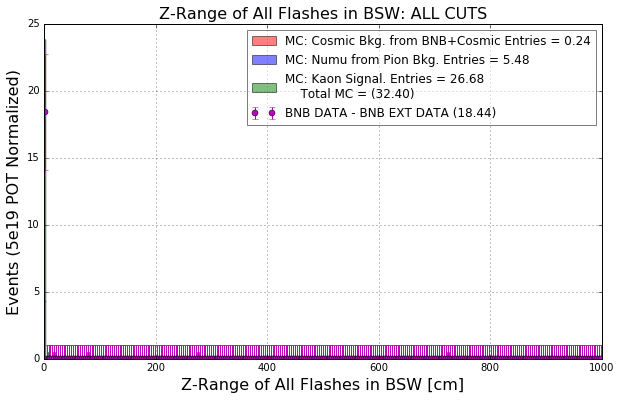

In [37]:
myvar = 'BSW_flash_z_range'
mylogy = None
mybins = np.linspace(0,1000,300)
mytitlebase = 'Z-Range of All Flashes in BSW'
myshapeonly = False
myxlabel = 'Z-Range of All Flashes in BSW [cm]'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel,mylogy=mylogy)

In [33]:
print 2.1*200*29000*0.01*0.01

1218.0


nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


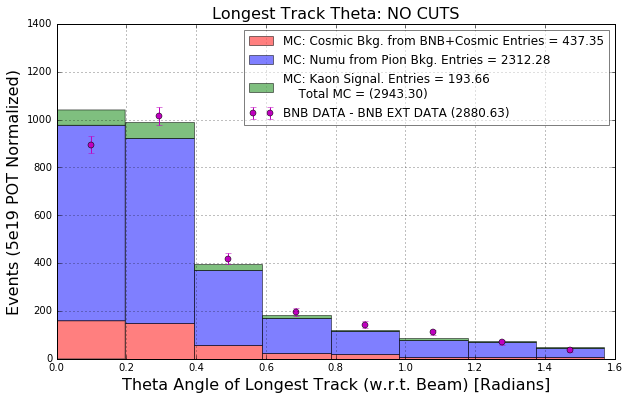

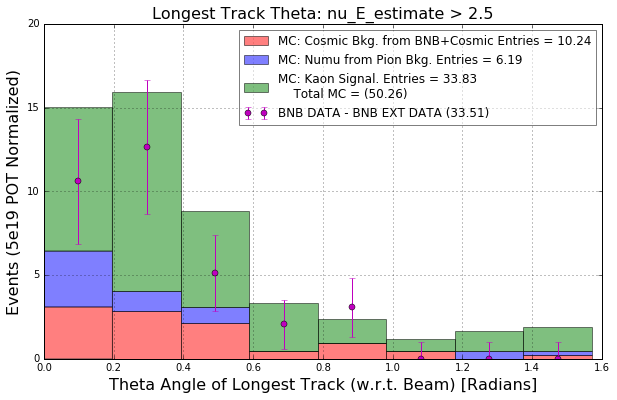

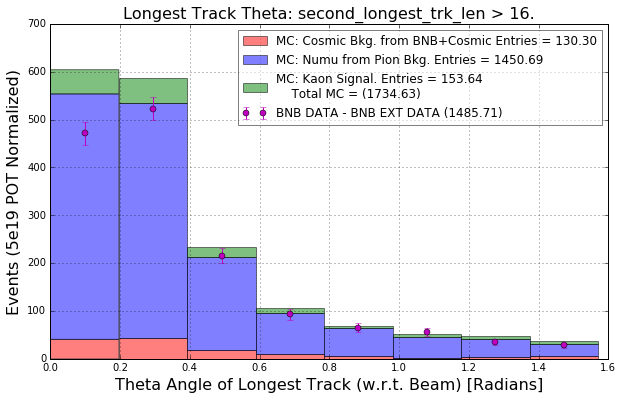

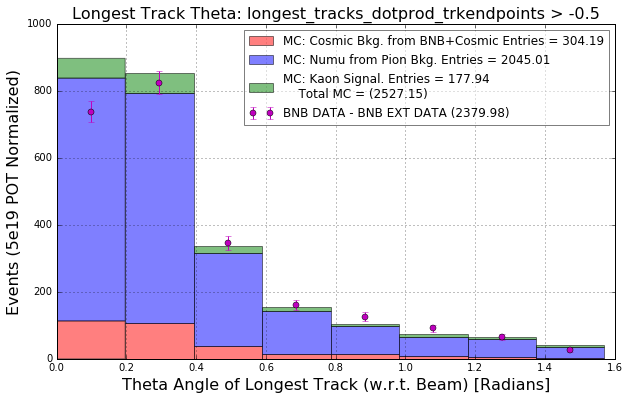

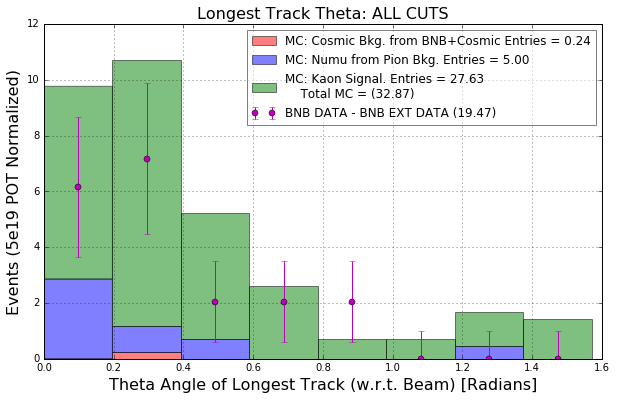

In [127]:
myvar = 'longest_trk_theta'
mylogy = None
mybins = np.linspace(0,3.1415/2.,9)
mytitlebase = 'Longest Track Theta'
myshapeonly = False
myxlabel = 'Theta Angle of Longest Track (w.r.t. Beam) [Radians]'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel,mylogy)

In [ ]:
mybins = np.linspace(0,6,100)
fuck = df_dict['mcnu'].hist('true_nu_E',bins=mybins)
fuck = df_dict['mcnu'].query('nu_E_estimate > 2.5').hist('true_nu_E',bins=mybins)


['true_nu_pdg' 'true_nu_E' 'true_nu_CCNC' 'true_nu_mode'
 'longest_trk_contained' 'p_phi' 'mu_phi' 'correct_ID' 'mu_end_dedx'
 'mu_start_dedx' 'fndecay' 'mu_p_dirdot' 'true_lepton_pdg'
 'true_lepton_momentum' 'n_associated_tracks' 'longest_trk_len'
 'second_longest_trk_len' 'longest_trk_theta' 'longest_trk_MCS_mom'
 'nu_E_estimate' 'true_nu_x' 'true_nu_y' 'true_nu_z' 'dist_reco_true_vtx'
 'max_tracks_dotprod' 'longest_tracks_dotprod'
 'longest_tracks_dotprod_trkendpoints' 'longest_track_end_x'
 'longest_track_end_y' 'longest_track_end_z']


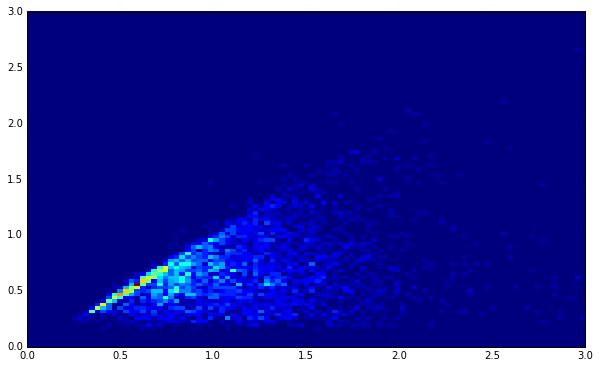

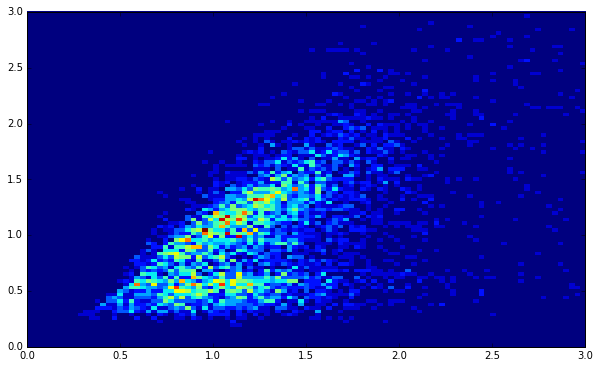

In [20]:
print df_dict['mcnu'].columns.values
plt.figure(figsize=(10,6))
myx = df_dict['mcnu'].query('longest_trk_contained and correct_ID')['true_nu_E']
myy = df_dict['mcnu'].query('longest_trk_contained and correct_ID')['nu_E_estimate']
fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,3,100))
plt.figure(figsize=(10,6))
myx = df_dict['mcnu'].query('not longest_trk_contained and correct_ID')['true_nu_E']
myy = df_dict['mcnu'].query('not longest_trk_contained and correct_ID')['nu_E_estimate']
fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,3,100))

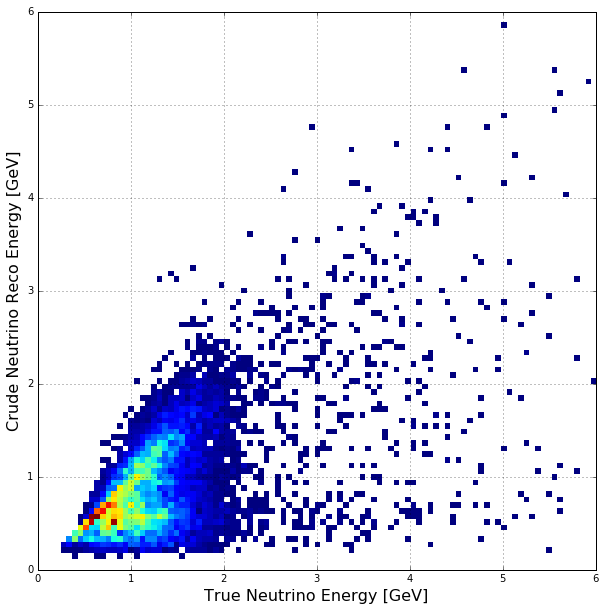

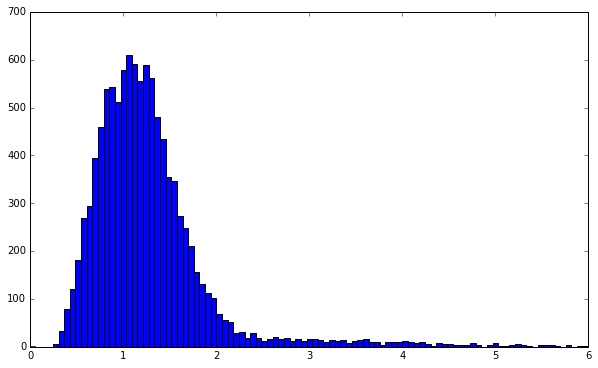

In [22]:
plt.figure(figsize=(10,10))
myx = df_dict['mcnu'].query('correct_ID')['true_nu_E']
myy = df_dict['mcnu'].query('correct_ID')['nu_E_estimate']
fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,6,100),cmin=1)
plt.xlabel('True Neutrino Energy [GeV]',fontsize=16)
plt.ylabel('Crude Neutrino Reco Energy [GeV]',fontsize=16)
plt.grid(True)

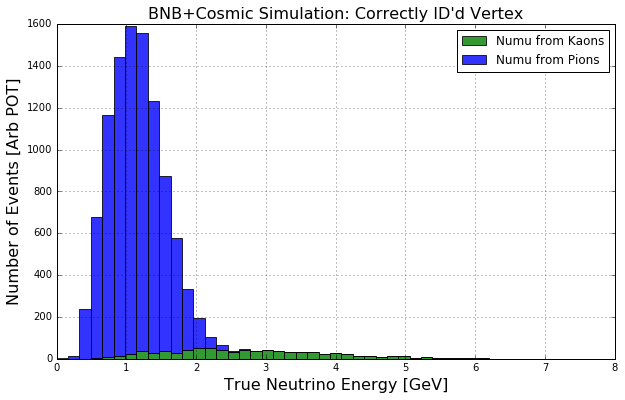

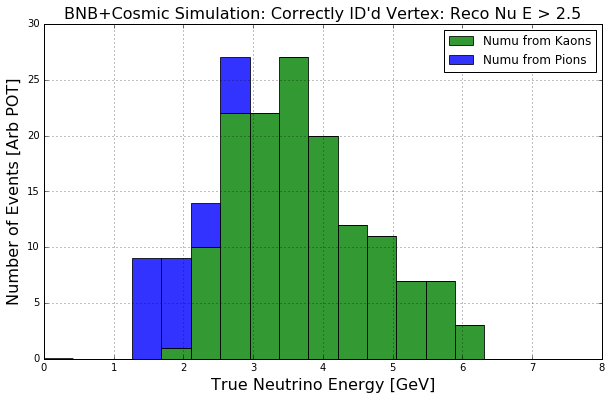

In [92]:
plt.figure(figsize=(10,6))
mybins = np.linspace(0,8,50)
myx1 = df_dict['mcnu'].query('correct_ID and fndecay < 10')['true_nu_E'].values
myx2 = df_dict['mcnu'].query('correct_ID and fndecay >= 10')['true_nu_E'].values
fuck = plt.hist([myx1,myx2],bins=mybins,alpha=0.8,stacked=True,rwidth=1.,
               label=['Numu from Kaons','Numu from Pions'],
               color=['g','b'])
#plt.yscale('log')
plt.grid(True)
plt.ylabel('Number of Events [Arb POT]',fontsize=16)
plt.legend(loc=0)
plt.title('BNB+Cosmic Simulation: Correctly ID\'d Vertex',fontsize=16)
fart = plt.xlabel('True Neutrino Energy [GeV]',fontsize=16)

plt.figure(figsize=(10,6))
mybins = np.linspace(0,8,20)
myx1 = df_dict['mcnu'].query('correct_ID and fndecay < 10 and nu_E_estimate > 2.5')['true_nu_E'].values
myx2 = df_dict['mcnu'].query('correct_ID and fndecay >= 10 and nu_E_estimate > 2.5')['true_nu_E'].values
fuck = plt.hist([myx1,myx2],bins=mybins,alpha=0.8,stacked=True,rwidth=1.,
               label=['Numu from Kaons','Numu from Pions'],
               color=['g','b'])
#plt.yscale('log')
plt.grid(True)
plt.ylabel('Number of Events [Arb POT]',fontsize=16)
plt.legend(loc=0)
plt.title('BNB+Cosmic Simulation: Correctly ID\'d Vertex: Reco Nu E > 2.5',fontsize=16)
fart = plt.xlabel('True Neutrino Energy [GeV]',fontsize=16)

In [43]:
n_pi = len(df_dict['mcnu'].query('correct_ID and fndecay >= 10'))
n_pf = len(df_dict['mcnu'].query('correct_ID and fndecay >= 10 and nu_E_estimate > 2.5'))
n_ki = len(df_dict['mcnu'].query('correct_ID and fndecay < 10'))
n_kf = len(df_dict['mcnu'].query('correct_ID and fndecay < 10 and nu_E_estimate > 2.5'))
print "n_pi = %d, n_pf = %d, n_ki = %d, n_kf = %d" % (n_pi, n_pf, n_ki, n_kf)
print "Fraction pion removed: %0.4f. Fraction Kaon removed: %0.4f" % \
(1.-float(n_pf)/n_pi, 1.-float(n_kf)/n_ki)
print "After cuts, sample is %0.3f%% kaons (excluding cosmic MIDs here)"%\
 (float(n_kf)/(n_kf+n_pf))

n_pi = 9708, n_pf = 26, n_ki = 813, n_kf = 142
Fraction pion removed: 0.9973. Fraction Kaon removed: 0.8253
After cuts, sample is 0.845% kaons (excluding cosmic MIDs here)


In [91]:
#investigating events where reco nu E > 2.5 but true nu_E < 2.5
# results: they are mostly numu, mostly CC though non-negligible NC
# they are mostly correct_ID FALSE (cosmic MIDs)
df = df_dict['mcnu'].query('nu_E_estimate > 2.5 and true_nu_E < 2.5')
print "Total number of these events is",len(df)
print
print "Fraction of these events that have correct_ID == 0 is: ",\
float(len(df.query('correct_ID == 0')))/len(df)
print "Let's investigate these."
subdf_MID = df.query('correct_ID==0')
tmpquery = 'longest_tracks_dotprod_trkendpoints > 0.95 or longest_tracks_dotprod_trkendpoints < -0.95'
print "Fraction of these with direction dotprods abs() > 0.95 is:", \
float(len(subdf_MID.query(tmpquery)))/len(subdf_MID)
print
print "Now let's look at ones that ARE correct IDs:"
subdf_ID = df.query('correct_ID==1')
print "Fraction of these that are CC is",float(len(subdf_ID.query('true_nu_CCNC == 0')))/len(subdf_ID)
vars = ['true_nu_pdg','true_nu_E','nu_E_estimate',\
        'n_associated_tracks','longest_tracks_dotprod_trkendpoints']
print "Fraction of these that have reco nu E > 1.5 * true_nu_E is",\
float(len(subdf_ID.query('nu_E_estimate > 1.5 * true_nu_E')))/len(subdf_ID)
vars = ['nu_E_estimate','true_nu_E','true_lepton_momentum','longest_trk_MCS_mom','longest_trk_len']
print subdf_ID.query('nu_E_estimate > 1.5 * true_nu_E')[vars]



print subdf_MID.columns.values


Total number of these events is 73

Fraction of these events that have correct_ID == 0 is:  0.561643835616
Let's investigate these.
Fraction of these with direction dotprods abs() > 0.95 is: 0.146341463415

Now let's look at ones that ARE correct IDs:
Fraction of these that are CC is 1.0
Fraction of these that have reco nu E > 1.5 * true_nu_E is 0.46875
       nu_E_estimate  true_nu_E  true_lepton_momentum  longest_trk_MCS_mom  \
3331        3.120166   1.327377              1.044090           265.974079   
3897        3.164603   1.436196              0.818559           408.962888   
4237        2.856828   1.794314              1.580772           405.583471   
5147        3.618000   2.290794              1.266074           370.143311   
5845        2.698000   1.689772              1.043823           430.744040   
5950        6.448000   1.551419              0.742688           398.303629   
7537        2.665498   1.540502              0.824295           311.540708   
7634        2.645172

In [ ]:
#reco-true/true
def eres_plot(df,cuts=None):
    binning = np.linspace(0,5,20)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds = [], []
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        mydf = df
        if cuts is not None: 
            mydf = mydf.query(cuts)
        mydf = mydf.query('true_nu_E < %f and true_nu_E > %f'%(binmax,binmin))
        true = np.array(mydf['true_nu_E'])
        reco = np.array(mydf['nu_E_estimate'])
        myreses.append( ((reco-true)/true).mean() )
        mystds.append( ((reco-true)/true).std() )
    plt.figure(figsize=(10,6))
    plt.plot(bincenters[:-1],myreses,'ro--',label='Mean of Distribution')
    plt.plot(bincenters[:-1],mystds,'bo--',label='Std of Distribution')
    plt.ylabel('$\\frac{Reco Energy - True Energy}{True Energy}$: Mean, or Std',fontsize=15)
    plt.xlabel('True Neutrino Energy',fontsize=15)
    plt.grid(True)
    plt.legend(loc=3)

In [ ]:
eres_plot(df_dict['mcnu'],cuts='correct_ID')

In [99]:
#reco-true/true vs max z-position in detector
def eres_plot_zpos(df,cuts=None):
    binning = np.linspace(100,1100,10)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds = [], []
    for x in bincenters:
        mydf = df
        if cuts is not None: 
            mydf = mydf.query(cuts)
        mydf = mydf.query('true_nu_z < %f'%(x))
        true = np.array(mydf['true_nu_E'])
        reco = np.array(mydf['nu_E_estimate'])
        myreses.append( ((reco-true)/true).mean() )
        mystds.append( ((reco-true)/true).std() )
    plt.figure(figsize=(10,6))
    plt.plot(bincenters,myreses,'ro--',label='Mean of Distribution')
    plt.plot(bincenters,mystds,'bo--',label='Std of Distribution')
    plt.ylabel('$\\frac{Reco Energy - True Energy}{True Energy}$: Mean, or Std',fontsize=15)
    plt.xlabel('Max z- Position of Neutrino Vertex',fontsize=15)
    plt.grid(True)
    plt.legend(loc='best')

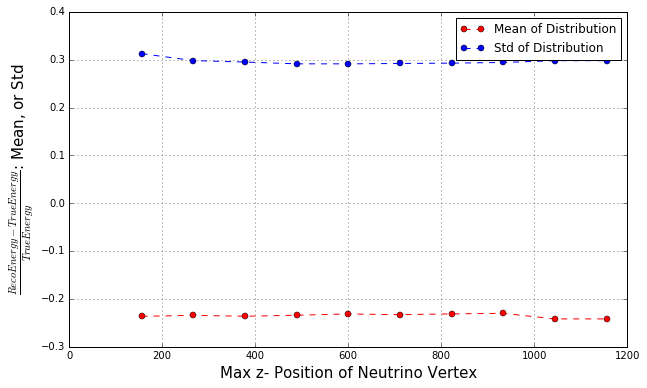

In [100]:
eres_plot_zpos(df_dict['mcnu'],cuts='correct_ID')

In [ ]:
subdf = df_dict['mcnu'].query('true_nu_E > 1. and nu_E_estimate < 0.75 and correct_ID')

In [ ]:
fuck = np.linspace(0,2000,50)
bigdf = df_dict['mcnu'].query('correct_ID')

bigdf.hist('true_lepton_momentum',bins=fuck/1000.)
bigdf.hist('longest_trk_MCS_mom',bins=fuck)
shitballs = subdf.hist('true_lepton_momentum',bins=fuck/1000.)
shitballs = subdf.hist('longest_trk_MCS_mom',bins=fuck)


In [ ]:
myvar = 'longest_trk_MCS_mom'
mybins = np.linspace(0,3000,50)
mytitlebase = 'Longest Track MCS Momentum'
myshapeonly = False
myxlabel = 'Longest Track MCS Momentum [MeV]'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel)

nu_E_estimate > 2 and nu_E_estimate > 2.5 and second_longest_trk_len > 16. and longest_tracks_dotprod_trkendpoints > -0.5


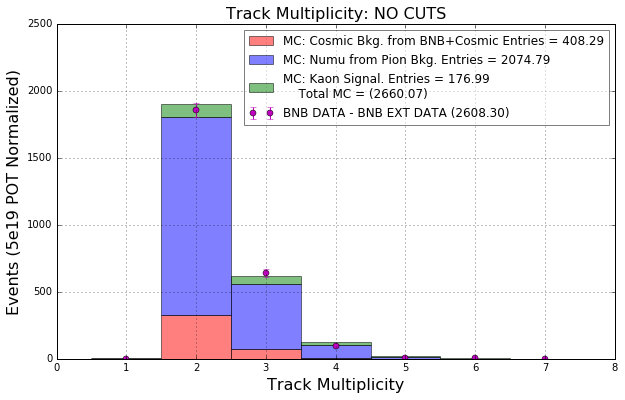

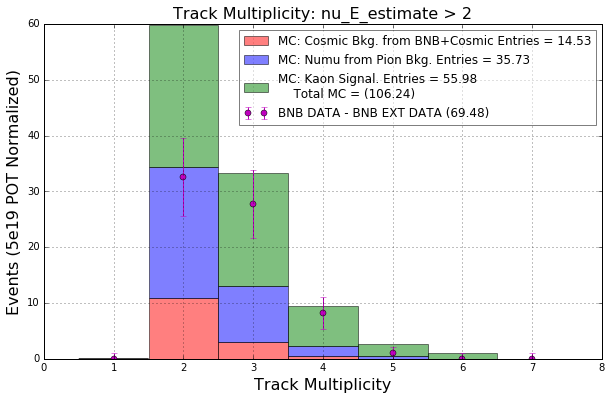

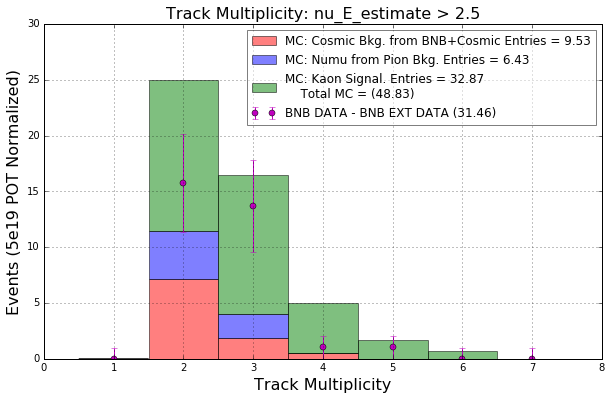

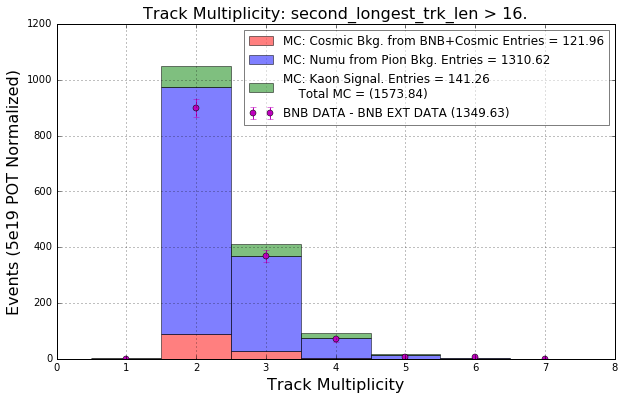

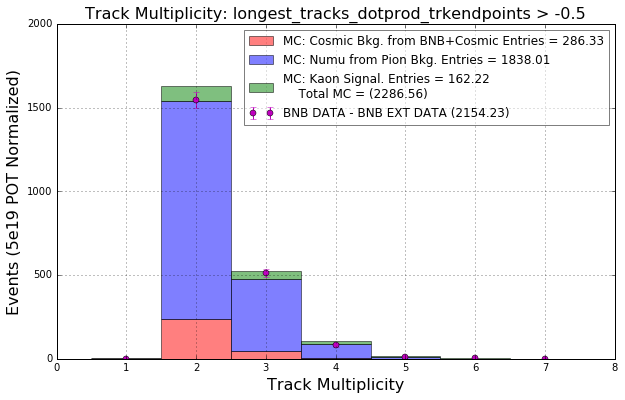

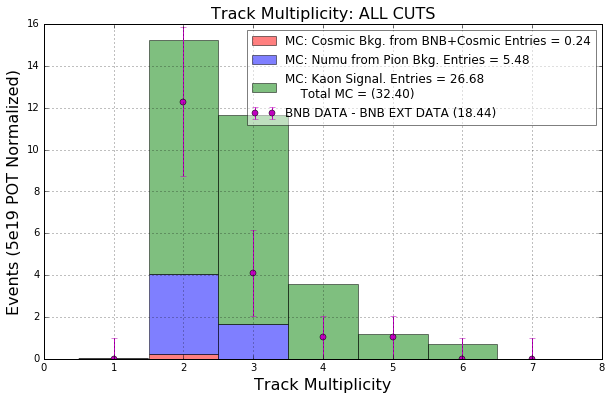

In [16]:
myvar = 'n_associated_tracks'
mylogy = None
mybins = np.linspace(0.5,7.5,8)
mytitlebase = 'Track Multiplicity'
myshapeonly = False
myxlabel = 'Track Multiplicity'
myylabel = 'Events (5e19 POT Normalized)'
loopCutsPlots(myvar,mybins,mytitlebase,myshapeonly,myxlabel,myylabel,mylogy)

In [ ]:
def computeCutImpact(myquery1 = None, myquery2 = None):
    """
    Query 1 is first query (for example, NO cuts)
    Query 2 is the second query, whose impact you are quantifying
    """
    print
    print "COMPUTING CUT IMPACT!"
    print "Base Query = %s" % ('No Cuts' if not myquery1 else myquery1)
    print "Placing Cut = %s" % myquery2
    print
    mydict = df_dict['mcnu']
    if myquery1 is not None: mydict = df_dict['mcnu'].query(myquery1)
    myweight = (5.e19) / pot_per_sample['mcnu']  
    myinum_pion = len(mydict.query('fndecay >= 10 and correct_ID == 1'))*float(myweight)
    myinum_kaon = len(mydict.query('fndecay < 10 and correct_ID == 1'))*float(myweight)
    myinum_cosm = len(mydict.query('correct_ID == 0'))*float(myweight)
    
    myfnum_pion = len(mydict.query('fndecay >= 10 and correct_ID == 1 and %s'%myquery2))*float(myweight)
    myfnum_kaon = len(mydict.query('fndecay < 10 and correct_ID == 1 and %s'%myquery2))*float(myweight)
    myfnum_cosm = len(mydict.query('correct_ID == 0 and %s'%myquery2))*float(myweight)

    mydict = df_dict['datanu']
    if myquery1 is not None: mydict = df_dict['datanu'].query(myquery1)
    myweight = (5.e19) / pot_per_sample['datanu']  
    myinum_bnb = len(mydict)
    myfnum_bnb = len(mydict.query(myquery2))
    
    mydict = df_dict['databkg']
    if myquery1 is not None: mydict = df_dict['databkg'].query(myquery1)
    myweight = (5.e19) / pot_per_sample['databkg']  
    myinum_ext = len(mydict)
    myfnum_ext = len(mydict.query(myquery2)) 
    
    print "\tN_Pion\tN_Cosm\tN_Kaon\tN_BNB\tN_EXT\tN_MCTot\tN_Sig-Bkg"
    print "N_EVTS\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f" % \
    (myinum_pion,myinum_cosm,myinum_kaon,myinum_bnb,myinum_ext,\
     myinum_pion+myinum_cosm+myinum_kaon,myinum_bnb-myinum_ext)
    print "AFTER\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f\t%0.1f" % \
    (myfnum_pion,myfnum_cosm,myfnum_kaon,myfnum_bnb,myfnum_ext,\
     myfnum_pion+myfnum_cosm+myfnum_kaon,myfnum_bnb-myfnum_ext)
    print "Remain\t%0.1f%%\t%0.1f%%\t%0.1f%%\t%0.1f%%\t%0.1f%%\t%0.1f%%\t%0.1f%%" % \
    (100.*myfnum_pion/myinum_pion,100.*myfnum_cosm/myinum_cosm,\
     100.*myfnum_kaon/myinum_kaon,100.*myfnum_bnb/myinum_bnb,\
     100.*myfnum_ext/myinum_ext,\
    100.*(myfnum_pion+myfnum_cosm+myfnum_kaon)/(myinum_pion+myinum_cosm+myinum_kaon),\
     100.*(myfnum_bnb-myfnum_ext)/(myinum_bnb-myinum_ext))
    print
    
    ipdiff = 100.*(((myinum_pion+myinum_cosm+myinum_kaon)-(myinum_bnb-myinum_ext))/(myinum_bnb-myinum_ext))
    fpdiff = 100.*(((myfnum_pion+myfnum_cosm+myfnum_kaon)-(myfnum_bnb-myfnum_ext))/(myfnum_bnb-myfnum_ext)) 
    print "Before cuts, percent difference b/t data and MC is %0.1f%%" % ipdiff
    print "After cuts, percent difference b/t data and MC is %0.1f%%" % fpdiff
       
    

In [ ]:
for cut in mycuts:
    computeCutImpact(myquery1=None,myquery2=cut)

In [ ]:
print list(df_dict['datanu'].columns.values)
print mycuts

In [ ]:
myvar = 'longest_tracks_dotprod_trkendpoints'
mybins = np.linspace(-1,1,20)
mytitle = myvar
myshapeonly = False
myquery = ''
myylims = (0,350)
plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims)
plt.axvline(x=-0.5, ymin=0, ymax=350, linewidth=4,color='red')

myvar = 'nu_E_estimate'
mybins = np.linspace(0,5,20)
mytitle = 'Estimated Nu Energy'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = ''
myylims = (0,1000)
plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims)
plt.axvline(x=2.5, ymin=0, ymax=1000, linewidth=4,color='red')

myvar = 'nu_E_estimate'
mybins = np.linspace(2.5,5,20)
mytitle = 'Estimated Nu Energy'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = ''
myylims = (0,20)
plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims)
plt.axvline(x=2.5, ymin=0, ymax=1000, linewidth=4,color='red')

myvar = 'second_longest_trk_len'
mybins = np.linspace(0,150,40)
mytitle = 'Second Longest Track Length'
myshapeonly = False
myquery = ''
myylims = (0,600)
myxlabel = 'Second Longest Track Length [cm]'
myylabel = 'Events (5e19 POT Normalized)'
plotVariableComparison(myvar,mybins,myquery,mytitle,myshapeonly,myylims)
line = plt.axvline(x=16, ymin=0, ymax=600, linewidth=4,color='red')

In [ ]:
def plotVariableComparisonBkg(myvar, mybins, myquery, mytitle, myshapeonly = False, myylims = None,\
                           myxlabel = 'test', myylabel = 'test'):

    plt.figure(figsize=(10,6))
    poop = plt.grid(True)
    plt.title(mytitle,fontsize=16)
  
    mydict_intime = df_dict['mcbkg']
    if myquery: mydict_intime = df_dict['mcbkg'].query(myquery)
    myweight_intime = (5.e19) / pot_per_sample['mcbkg']
    myvals_intime = mydict_intime[myvar].values
    nphist = np.histogram(myvals_intime,bins=mybins,
                          weights=[myweight_intime]*len(myvals_intime),
                          normed=myshapeonly)
    integral_intime = np.sum(nphist[0])
    
    poop = plt.hist(myvals_intime,bins=mybins,
                    label='MC: Cosmic Bkg. from In Time Cosmic Entries = %0.2f' % integral_intime,
                    alpha=0.5,
                    weights=[myweight_intime]*len(myvals_intime),
                    color='cyan',
                    stacked=False,
                    rwidth=1.)

    myextvals = df_dict['databkg'][myvar].values
    if myquery: myextvals = df_dict['databkg'].query(myquery)[myvar].values
    myextweight = (5.e19) / pot_per_sample['databkg']
    extintegral = 0.
    if len(myextvals):
        blah = plt.hist(myextvals,bins=mybins,color='g',
                        alpha=0,weights=[myextweight]*len(myextvals),normed=myshapeonly)
    
        yextvals = blah[0]
        xextvals = [blah[1][i]+(blah[1][i+1]-blah[1][i])/2. for i in xrange(len(blah[1][:-1]))]
        yerrs = np.sqrt(np.array(yextvals)*myextweight)
        extintegral = np.sum(blah[0])
        awefia = plt.errorbar(xextvals,yextvals,fmt='ro', yerr=yerrs,
                          label='BNB EXT DATA: Entries = %0.2f' % extintegral
                         )

    plt.ylim((0, plt.ylim()[1]))
    if myylims is not None:
        plt.ylim(myylims)
    leg = plt.legend()
    plt.xlabel(myxlabel,fontsize=16)
    plt.ylabel(myylabel,fontsize=16)
    dummy = leg.get_frame().set_alpha(0.5)

In [ ]:
myvar = 'longest_tracks_dotprod_trkendpoints'
mybins = np.linspace(-1,1,20)
mytitle = 'Longest Two Tracks: Direction Dot-Product'
myshapeonly = False
myquery = ''
myxlabel = 'Dot Product of Longest Two Track Directions'
myylabel = 'Events (5e19 POT Normalized)'
myylims = (0,80)
plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
plt.axvline(x=-0.5, ymin=0, ymax=350, linewidth=4,color='red')

myvar = 'nu_E_estimate'
mybins = np.linspace(0,5,20)
mytitle = 'Estimated Nu Energy'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = ''
myylims = (0,300)
plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
plt.axvline(x=2.5, ymin=0, ymax=1000, linewidth=4,color='red')

myvar = 'nu_E_estimate'
mybins = np.linspace(2.5,5,20)
mytitle = 'Estimated Nu Energy'
myshapeonly = False
myxlabel = 'Cruedly Reconstructed Neutrino Energy [GeV]'
myylabel = 'Events (5e19 POT Normalized)'
myquery = ''
myylims = (0,10)
plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
plt.axvline(x=2.5, ymin=0, ymax=1000, linewidth=4,color='red')

myvar = 'second_longest_trk_len'
mybins = np.linspace(0,150,40)
mytitle = 'Second Longest Track Length'
myshapeonly = False
myquery = ''
myylims = (0,250)
myxlabel = 'Second Longest Track Length [cm]'
myylabel = 'Events (5e19 POT Normalized)'
plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)
line = plt.axvline(x=16, ymin=0, ymax=600, linewidth=4,color='red')

In [ ]:
myvar = 'longest_trk_len'
mybins = np.linspace(0,1000,80)
mytitle = 'Longest Track Length'
myshapeonly = False
myquery = ''
myylims = (0,200)
myxlabel = 'Longest Track Length [cm]'
myylabel = 'Events (5e19 POT Normalized)'
plotVariableComparisonBkg(myvar,mybins,myquery,mytitle,myshapeonly,myylims,myxlabel,myylabel)

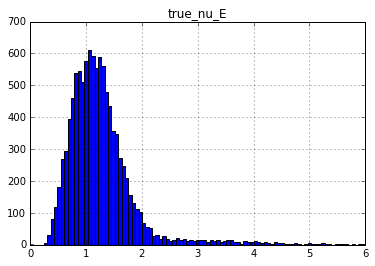

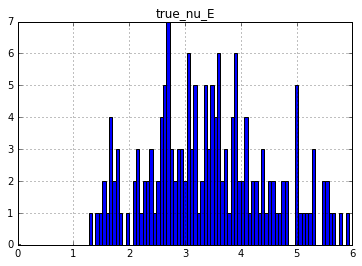

In [135]:
mybins = np.linspace(0,6,100)
fuck = df_dict['mcnu'].query('correct_ID').hist('true_nu_E',bins=mybins)
fuck = df_dict['mcnu'].query('nu_E_estimate > 2.5 and correct_ID').hist('true_nu_E',bins=mybins)

(onbeam - offbeam)                               vs mcc7bnbcosmic
overall, (onbeam - offbeam) has too many short tracks
just offbeam has too few short tracks
that means onbeam has way too many short tracks

let's say onbeam is 50 short tracks, offbeam has 30 short tracks.
expect 40 short tracks in offbeam from mc
onbeam minus offbeam is 20 short tracks, bnbcosmic has 15 short tracks

RUN ON IN TIME COSMICS
for events Xiao filter selects, histogram: all track lengths, all mctrack lengths
since # tracks and # mctracks don't equal, maybe compare shape
    -- this doesn't work because pandora removes its cosmic tracks automatically